# TUGAS 1
Mengoptimalkan CNN dari Praktikum 2 hingga menghasilkan akurasi diatas 80%

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_val, y_val) = cifar10.load_data()
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [3]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(50000, 32, 32, 3) (50000, 10)
(10000, 32, 32, 3) (10000, 10)


In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from keras.optimizers import Adam

model = Sequential()

# Blok 1
model.add(Conv2D(64, (1, 1), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(64, (5, 5)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2, 2)))

# Blok 2
model.add(Conv2D(128, (1, 1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(128, (5, 5)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.25))

# Blok 3
model.add(Conv2D(256, (1, 1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(256, (3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(256, (5, 5)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.25))

# Kelasifikasi
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

c:\Users\vy\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Kompilasi model
model.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 128)    │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 11, 11, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 7, 7, 256)      │        33,02

 Total params: 2,974,986 (11.35 MB)

 Trainable params: 2,972,298 (11.34 MB)

 Non-trainable params: 2,688 (10.50 KB)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    channel_shift_range=50,
    horizontal_flip=True)
validationgen = ImageDataGenerator(
    rescale=1./255)

datagen.fit(X_train)
validationgen.fit(X_val)
history = model.fit(datagen.flow(X_train, y_train, batch_size=128),
                    steps_per_epoch=int(len(X_train) / 128), 
                    validation_data=validationgen.flow(X_val, y_val), 
                    epochs=100)



c:\Users\vy\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 809ms/step - accuracy: 0.2808 - loss: 1.9781

c:\Users\vy\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


390/390 ━━━━━━━━━━━━━━━━━━━━ 335s 846ms/step - accuracy: 0.2810 - loss: 1.9776 - val_accuracy: 0.3266 - val_loss: 1.9120
Epoch 2/100
  1/390 ━━━━━━━━━━━━━━━━━━━━ 4:50 748ms/step - accuracy: 0.4062 - loss: 1.5533

c:\Users\vy\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


390/390 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.4062 - loss: 1.5533 - val_accuracy: 0.3331 - val_loss: 1.8656
Epoch 3/100
390/390 ━━━━━━━━━━━━━━━━━━━━ 311s 797ms/step - accuracy: 0.4665 - loss: 1.4806 - val_accuracy: 0.5441 - val_loss: 1.2612
Epoch 4/100
390/390 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.5078 - loss: 1.4505 - val_accuracy: 0.5501 - val_loss: 1.2414
Epoch 5/100
390/390 ━━━━━━━━━━━━━━━━━━━━ 318s 814ms/step - accuracy: 0.5519 - loss: 1.2528 - val_accuracy: 0.6158 - val_loss: 1.1470
Epoch 6/100
390/390 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.5703 - loss: 1.2510 - val_accuracy: 0.6246 - val_loss: 1.1032
Epoch 7/100
390/390 ━━━━━━━━━━━━━━━━━━━━ 311s 797ms/step - accuracy: 0.6040 - loss: 1.1151 - val_accuracy: 0.6695 - val_loss: 0.9432
Epoch 8/100
390/390 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.5938 - loss: 1.2273 - val_accuracy: 0.6655 - val_loss: 0.9479
Epoch 9/100
390/390 ━━━━━━━━━━━━━━━━━━━━ 310s 796ms/step - accuracy: 0.6485 - loss: 0.996

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.8275 - loss: 0.5262

Validation Loss: 0.5118849277496338
Validation Accuracy: 0.8345000147819519


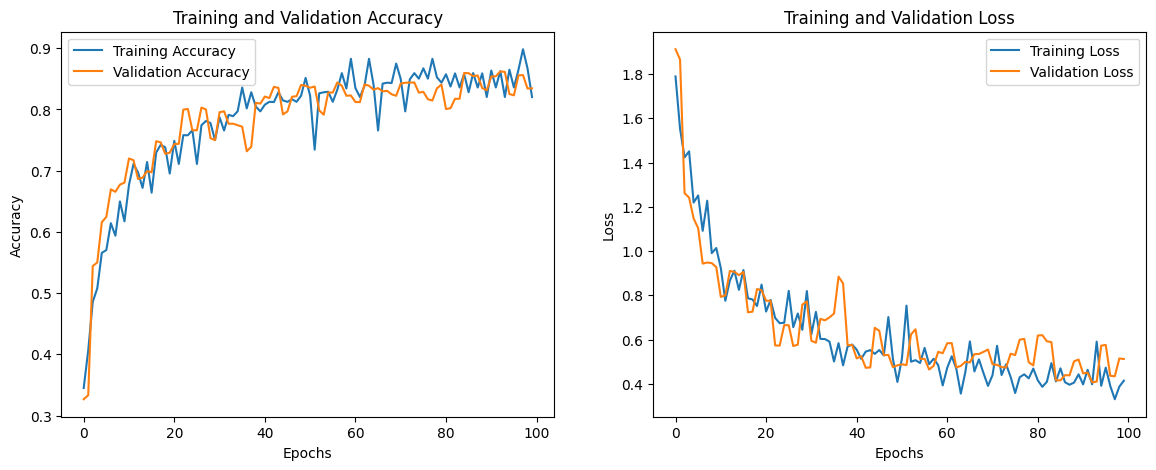

In [8]:
# Evaluasi model pada data validasi
val_loss, val_accuracy = model.evaluate(validationgen.flow(X_val, y_val), verbose=1)
print(f"\nValidation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# Plot akurasi dan loss selama pelatihan
plt.figure(figsize=(14, 5))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


# TUGAS 2
Menerapkan CNN Pada MNIST Dataset

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

# Memuat dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocessing data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 12s 1us/step


In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [11]:
# Membangun model CNN
model = Sequential()

# Layer Konvolusi 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer Konvolusi 2
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten
model.add(Flatten())

# Dense Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

c:\Users\vy\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Melatih model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.8197 - loss: 0.5757 - val_accuracy: 0.9821 - val_loss: 0.0572
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9694 - loss: 0.1007 - val_accuracy: 0.9869 - val_loss: 0.0424
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9785 - loss: 0.0738 - val_accuracy: 0.9880 - val_loss: 0.0352
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9831 - loss: 0.0575 - val_accuracy: 0.9911 - val_loss: 0.0280
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9861 - loss: 0.0481 - val_accuracy: 0.9906 - val_loss: 0.0294
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9872 - loss: 0.0422 - val_accuracy: 0.9902 - val_loss: 0.0275
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9899 - loss: 0.0340 - val_accuracy: 0.9912 - val_loss: 0.0265
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9899 - loss: 0.0325 - val_accu

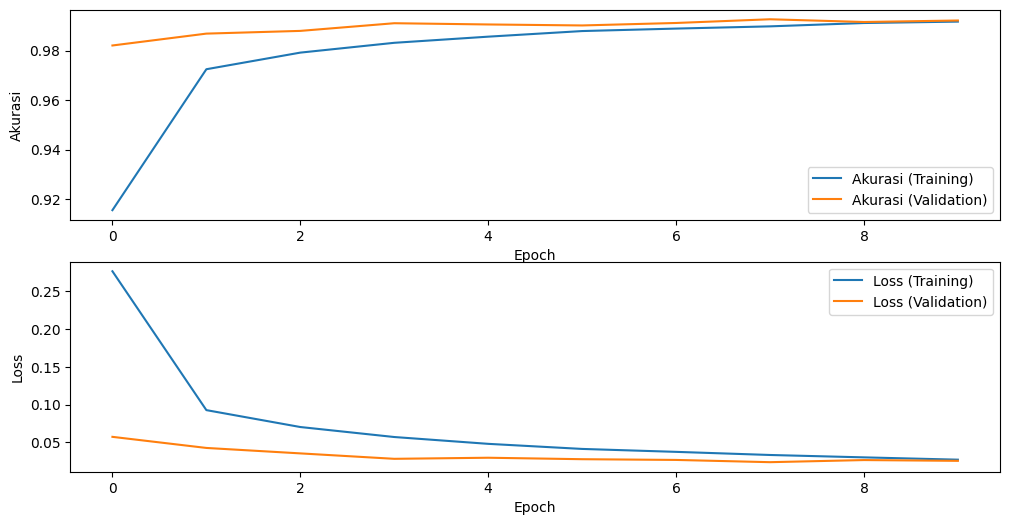

In [13]:
# Plotting Akurasi dan Loss
plt.figure(figsize=(12, 6))

# Plot akurasi
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Akurasi (Training)')
plt.plot(history.history['val_accuracy'], label='Akurasi (Validation)')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Plot loss
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Loss (Training)')
plt.plot(history.history['val_loss'], label='Loss (Validation)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()